# Example using Python Threading Module

Consider the problem of approximating the integral 
$$\int_0^4 \sin(t^2) dt$$

How can we parallelize this problem?

Idea: Break the interval $[0,4]$ into 4 sub-intervals and use 4 threads to compute the result

Use the error bound to determine number of steps required

$$E_T = K_2 \cfrac{(b-a)^3}{12 N^2} \implies N = \sqrt{K_2 \cfrac{(b-a)^3}{12 E_T}}\hspace{2em}\text{Where } K_2 = \max_{x \in [a,b]} f''(x)$$

$$\cfrac{d}{dt} \sin(t^2) = 2t \cos(t^2) \text{ so } \cfrac{d^2}{dt^2} \sin(t^2) = 2\cos(t^2)+4t^2\sin(t^2)$$



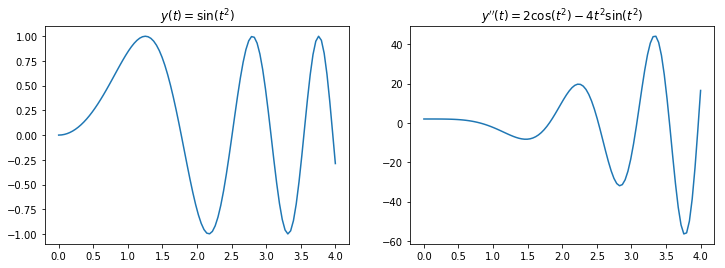

In [1]:
from numpy import linspace, sin, cos
from matplotlib import pyplot as plt
%matplotlib inline

xs = linspace(0,4,100)
ys = sin(xs**2)
y2ds = 2*cos(xs**2) - 4*xs**2 * sin(xs**2)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(xs, ys)
plt.title("$y(t) = \sin(t^2)$")
plt.subplot(122)
plt.plot(xs, y2ds)
plt.title("$y''(t) = 2\cos(t^2)- 4t^2 \sin(t^2)$")
plt.show()



From the plot of the second derivative on the right, we can estimate $K_2$ by 60.

In [22]:
from numpy import linspace, sqrt, ceil

def trapz(a,b,f,K2,eps):
    """ Compute the integral of a real-valued function f from a to b to within error eps
        Given the endpoints a and b, the function, K2 and the error tolerance
    """
    N = int(ceil(sqrt(K2*(b-a)**3 / 12 / eps)))
    #print("N = {}".format(N))
    xs = linspace(a,b,N+1)
    return (b-a)/2/N*(2*sum(f(xs)) - f(xs[0]) - f(xs[-1]))

def trapz_helper(a,b,K2):
    return trapz(a,b,sin_tsq,K2,1.0e-10)
    
def sin_tsq(t):
    return sin(t*t)



In [23]:
trapz_helper(0,4,60)

0.7471338446449246

Define a helper function that just requires the endpoints and $K_2$ value

In [35]:
import threading

def wrapper(func, args, res):
    res.append(func(*args))

def threaded_trapz():
    res = []
    unif = False
    p, ks = ([0, 4/3, 8/3, 4], [60,60,60]) if unif else ([0, 2, 3.5, 4], [15, 45, 60])
    for i in range(3):
        t = threading.Thread(target=wrapper, args=(trapz_helper, (p[i],p[i+1],ks[i]), res))
        t.start()
        t.join()
    return sum(res)

In [36]:
%timeit print(trapz(0,4,sin_tsq,60,1.0e-10))

0.7471338446449246
0.7471338446449246
0.7471338446449246
0.7471338446449246
0.7471338446449246
0.7471338446449246
0.7471338446449246
0.7471338446449246
221 ms ± 9.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit print(threaded_trapz())

0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.747133844605408
0.74713384